<a href="https://colab.research.google.com/github/ridhiaggarwal06/Practice-codes/blob/main/Linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving most_runs_average_strikerate.csv to most_runs_average_strikerate.csv


In [ ]:
dataset = pd.read_csv("most_runs_average_strikerate.csv")

In [ ]:
dataset.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
df = dataset.drop('batsman', axis=1)

In [ ]:
df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [ ]:
filling_nan = df.average.fillna(df.average.mean(), inplace = True)

In [ ]:
updated_df = df.describe()
updated_df

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,516.000000,516.000000
mean,430.625969,17.063953,335.645349,16.239901,105.433442
std,882.275431,28.124511,663.593679,10.780749,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.625000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,22.600806,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


# **Data** **splitting**

In [ ]:
X = updated_df[['total_runs', 'numberofballs', 'average']].values #array of features
y = updated_df['strikerate'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **EDA**

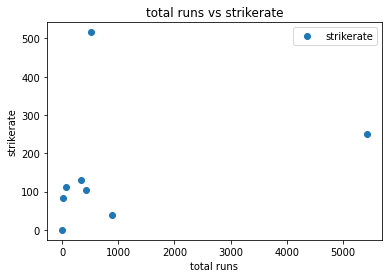

In [ ]:
#updated_df.groupby('total_runs')['strikerate'].mean().plot()
updated_df.plot(x='total_runs', y = 'strikerate', style='o')
plt.title('total runs vs strikerate')
plt.xlabel('total runs')
plt.ylabel('strikerate')
plt.show()

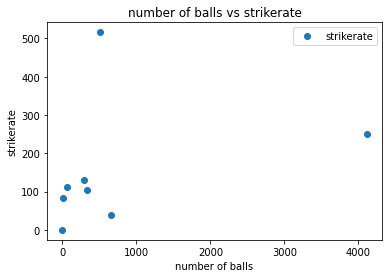

,numberofballs,strikerate
numberofballs,1.000000,0.300841
strikerate,0.300841,1.000000


In [ ]:
#updated_df.groupby('numberofballs')['strikerate'].mean().plot()
updated_df.plot(x='numberofballs', y = 'strikerate', style='o')
plt.title('number of balls vs strikerate')
plt.xlabel('number of balls')
plt.ylabel('strikerate')
plt.show()
updated_df[['numberofballs', 'strikerate']].corr()

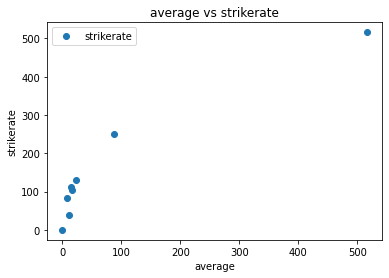

,average,strikerate
average,1.000000,0.947155
strikerate,0.947155,1.000000


In [ ]:
#updated_df.groupby('average')['strikerate'].mean().plot()
updated_df.plot(x='average', y = 'strikerate', style='o')
plt.title('average vs strikerate')
plt.xlabel('average')
plt.ylabel('strikerate')
plt.show()
updated_df[['average', 'strikerate']].corr()


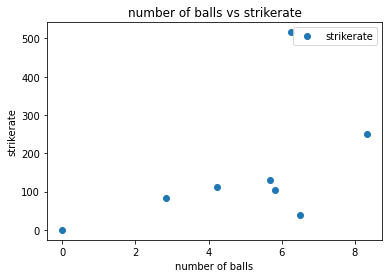

In [ ]:
updated_df['transformed'] = np.log(updated_df['numberofballs'])
updated_df.plot(x='transformed', y='strikerate', style='o')
plt.title('number of balls vs strikerate')
plt.xlabel('number of balls')
plt.ylabel('strikerate')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['total_runs', 'numberofballs', 'average'], columns = ['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
total_runs,-15710.683642
numberofballs,15771.161898
average,-310.888013


In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,130.499036,336.997133
1,39.633938,1.111818


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2-SCORE:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 122.51010882493985
Mean Squared Error: 22062.709030652928
R2-SCORE: -9.688693813284472
